<H1>Workshop 02 - Predicting loan case using Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("train_ctrUa4K.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset = dataset.sample(n=550, random_state = 79)

In [6]:
dataset.to_csv('ChristopherMitchell_2118979.csv')

In [7]:
data = pd.read_csv('ChristopherMitchell_2118979.csv')

In [8]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
1,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,134,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y
3,149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
4,231,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


In [9]:
data=data.drop('Unnamed: 0', axis = 1)

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
4,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


<h3>Q1. Use and explain the following DataFrame functions/properties on your data.<p>describe() size ndim shape

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,530.000000,538.000000,502.000000
mean,5273.783636,1660.239855,144.113208,342.825279,0.836653
std,5879.301796,3040.959688,81.909757,64.636407,0.370050
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2785.500000,0.000000,100.000000,360.000000,1.000000
50%,3722.000000,1211.500000,126.000000,360.000000,1.000000
75%,5701.000000,2332.250000,161.750000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


This function returns a statistical summary of the data within the data.

In [12]:
data.size

7150

This function shows the number of elements present within the dataset.

In [13]:
data.ndim

2

This function shows the dimensions of the dataset.

In [14]:
data.shape

(550, 13)

This function shows a tuple of dataset dimensions.

<h3>Q2. Is there any difference between dimensions of the original dataset and the new dataset? If yes, what is the difference?

In [15]:
data.shape

(550, 13)

In [16]:
dataset.shape

(550, 13)

Answer 2. There are no differences to the dimensions of the datasets in use.

<h3>Q3. What are the possible values 'Education' can take? Write code to display all the possible values of 'Education'.

In [17]:
dataset['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<h6>Answer 3.</h6><p>The values can be either Graduate or Not Graduate.

<H1>Data Analysis

In [18]:
columns = data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
4,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


<AxesSubplot:>

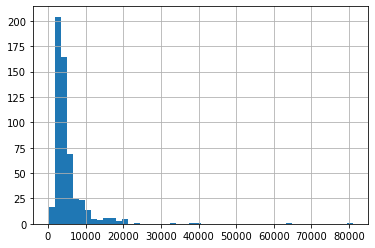

In [20]:
data['ApplicantIncome'].hist(bins=50)

<h3>Q4 Use boxplot and histogram on 'ApplicantIncome' to visualise its distribution.<p>Histogram and boxplot are used on the same feature to visualise the data distribution. Compare both the plots and report:

<B>Q4a. What are the extreme values? Are there any outliers(s) exist in this dataset? Explain with example based on the 'ApplicantIncome'?

<AxesSubplot:>

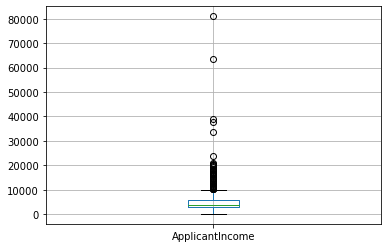

In [21]:
data.boxplot(column=['ApplicantIncome'], grid = True)

<h6>Answer 4a</h6><p>The extreme outliers in this dataset are the values in applicant income between 60,000 and 80,000.

<b>Q4b. Are the results of both the plots comparable? Are there any differences in the two plots? What are the key differences?

<h6>Answer 4b</h6>
<p>As both plots use the same dataset, they are comparable, however it is significalty easier to see the outlying data points on the boxplot.
<p>The histogram shows the volume of the bellcurve, being shown by the height of the bars, in a clear way that makes it easy to show the median income.
<p>This contrasts the boxplot, which shows the box below the 10,000 but has an increased empesis on the outling datapoint in the dataset.

<AxesSubplot:>

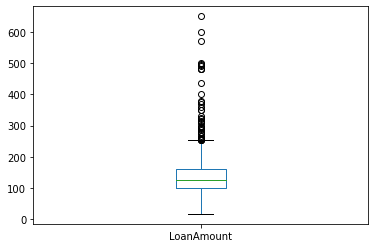

In [22]:
data.boxplot(column =['LoanAmount'], grid = False)

<AxesSubplot:>

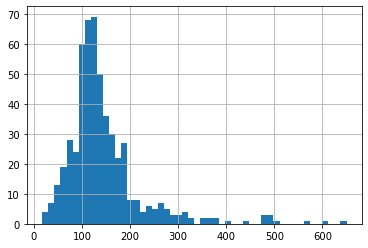

In [23]:
data['LoanAmount'].hist(bins=50)

In [24]:
data['Credit_History'].value_counts()

1.0    420
0.0     82
Name: Credit_History, dtype: int64

In [25]:
credit_history = data['Credit_History'].value_counts(ascending=True)

loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
                                   aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)

Frequency Table for Credit History:
0.0     82
1.0    420
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.073171
1.0                0.795238


In [26]:
data['Loan_Status'].value_counts()

Y    375
N    175
Name: Loan_Status, dtype: int64

In [27]:
data.shape

(550, 13)

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
4,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


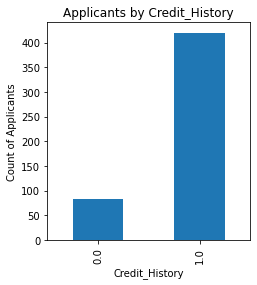

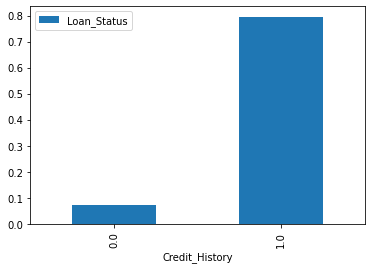

In [29]:
fig = plt.figure(figsize=(8,4))
axl = fig.add_subplot(121)
axl.set_xlabel('Credit_History')
axl.set_ylabel('Count of Applicants')
axl.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind= 'bar')
plt.show()

In [30]:
data['Gender'].value_counts()

Male      438
Female    101
Name: Gender, dtype: int64

In [31]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               11
Married               2
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     12
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
4,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


In [33]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace= True)

In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.000000,360.0,NaN,Urban,N
1,LP001002,Male,No,0,Graduate,No,5849,0.0,144.113208,360.0,1.0,Urban,Y
2,LP001487,Male,No,0,Graduate,No,4895,0.0,102.000000,360.0,1.0,Semiurban,Y
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.000000,360.0,1.0,Semiurban,Y
4,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.000000,180.0,1.0,Rural,Y


In [35]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               11
Married               2
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
data.shape

(550, 13)

In [37]:
data.to_csv('new_train.csv')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Education, Self_Employed]'>

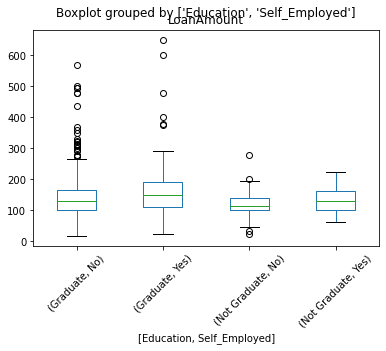

In [38]:
data.boxplot(column='LoanAmount', by = ['Education', 'Self_Employed'], grid=False, rot=45, fontsize=10)

In [39]:
data['Self_Employed'].value_counts()

No     448
Yes     73
Name: Self_Employed, dtype: int64

In [40]:
data['Self_Employed'].fillna('No', inplace=True)

In [41]:
data['Self_Employed'].value_counts()

No     477
Yes     73
Name: Self_Employed, dtype: int64

In [42]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               11
Married               2
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,538.000000,502.000000
mean,5273.783636,1660.239855,144.113208,342.825279,0.836653
std,5879.301796,3040.959688,80.403935,64.636407,0.370050
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2785.500000,0.000000,100.000000,360.000000,1.000000
50%,3722.000000,1211.500000,128.000000,360.000000,1.000000
75%,5701.000000,2332.250000,160.000000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


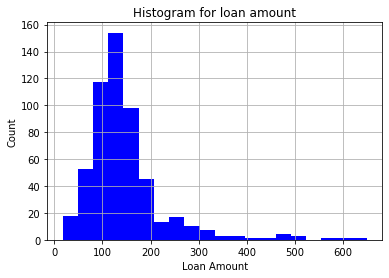

In [44]:
plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

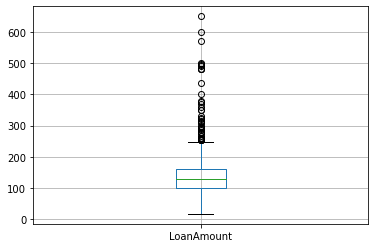

In [45]:
data.boxplot(column='LoanAmount')

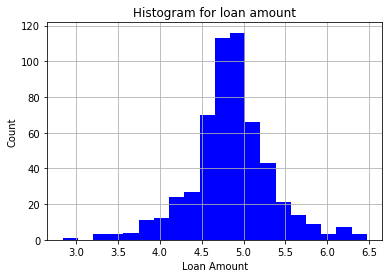

In [46]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
#data['LoanAmount_log].hist(bins = 20)
plt.hist(data['LoanAmount_log'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

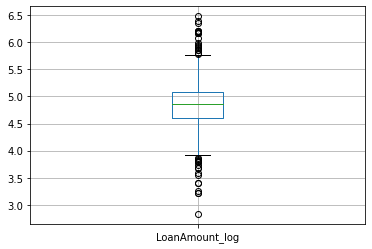

In [47]:
data.boxplot(column='LoanAmount_log')

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.000000,360.0,NaN,Urban,N,5.303305
1,LP001002,Male,No,0,Graduate,No,5849,0.0,144.113208,360.0,1.0,Urban,Y,4.970599
2,LP001487,Male,No,0,Graduate,No,4895,0.0,102.000000,360.0,1.0,Semiurban,Y,4.624973
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.000000,360.0,1.0,Semiurban,Y,4.828314
4,LP001768,Male,Yes,0,Graduate,No,3716,0.0,42.000000,180.0,1.0,Rural,Y,3.737670


In [49]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,538.000000,502.000000,550.000000
mean,5273.783636,1660.239855,144.113208,342.825279,0.836653,4.851446
std,5879.301796,3040.959688,80.403935,64.636407,0.370050,0.483401
min,150.000000,0.000000,17.000000,12.000000,0.000000,2.833213
25%,2785.500000,0.000000,100.000000,360.000000,1.000000,4.605170
50%,3722.000000,1211.500000,128.000000,360.000000,1.000000,4.852030
75%,5701.000000,2332.250000,160.000000,360.000000,1.000000,5.075174
max,81000.000000,41667.000000,650.000000,480.000000,1.000000,6.476972


In [50]:
data = data.drop(['LoanAmount'], axis=1)

<b>Missing Values Continuous

In [51]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [52]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<h2>Q5. Use LabelEncoder, to convert categorical variables into numeric

In [53]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,360.0,1.0,Urban,N,5.303305
1,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,4.970599
2,LP001487,Male,No,0,Graduate,No,4895,0.0,360.0,1.0,Semiurban,Y,4.624973
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,360.0,1.0,Semiurban,Y,4.828314
4,LP001768,Male,Yes,0,Graduate,No,3716,0.0,180.0,1.0,Rural,Y,3.737670


In [54]:
data.shape

(550, 13)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
columns = list(data)
print(columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log']


In [57]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,360.0,1.0,Urban,N,5.303305
1,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,4.970599
2,LP001487,Male,No,0,Graduate,No,4895,0.0,360.0,1.0,Semiurban,Y,4.624973
3,LP001520,Male,Yes,0,Graduate,No,4860,830.0,360.0,1.0,Semiurban,Y,4.828314
4,LP001768,Male,Yes,0,Graduate,No,3716,0.0,180.0,1.0,Rural,Y,3.737670


In [58]:
#columns = list(data.select_dtypes(exclude=['float64', 'int64']))

In [59]:
c_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [60]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
dtype: object

In [61]:
le = LabelEncoder()
for i in c_columns:
    data[i] = le.fit_transform(data[i])

In [62]:
data.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,1,1,1,0,0,4166,3369.0,360.0,1.0,2,0,5.303305
1,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.970599
2,LP001487,1,0,0,0,0,4895,0.0,360.0,1.0,1,1,4.624973
3,LP001520,1,1,0,0,0,4860,830.0,360.0,1.0,1,1,4.828314
4,LP001768,1,1,0,0,0,3716,0.0,180.0,1.0,0,1,3.737670
5,LP002582,0,0,0,1,1,17263,0.0,360.0,1.0,1,1,5.416100
6,LP002767,1,1,0,0,0,2768,1950.0,360.0,1.0,0,1,5.043425
7,LP001883,0,0,0,0,0,3418,0.0,360.0,1.0,0,0,4.905275
8,LP002936,1,1,0,0,0,3859,3300.0,180.0,1.0,0,1,4.955827
9,LP001233,1,1,1,0,0,10750,0.0,360.0,1.0,2,1,5.743003


In [63]:
from sklearn.preprocessing import normalize

In [64]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,1,1,1,0,0,4166,3369.0,360.0,1.0,2,0,5.303305
1,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.970599
2,LP001487,1,0,0,0,0,4895,0.0,360.0,1.0,1,1,4.624973
3,LP001520,1,1,0,0,0,4860,830.0,360.0,1.0,1,1,4.828314
4,LP001768,1,1,0,0,0,3716,0.0,180.0,1.0,0,1,3.737670


In [65]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,1,1,1,0,0,4166,3369.0,360.0,1.0,2,0,5.303305
1,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.970599
2,LP001487,1,0,0,0,0,4895,0.0,360.0,1.0,1,1,4.624973
3,LP001520,1,1,0,0,0,4860,830.0,360.0,1.0,1,1,4.828314
4,LP001768,1,1,0,0,0,3716,0.0,180.0,1.0,0,1,3.737670


In [66]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,1,1,1,0,0,4166,3369.0,360.0,1.0,2,0,5.303305
1,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.970599
2,LP001487,1,0,0,0,0,4895,0.0,360.0,1.0,1,1,4.624973
3,LP001520,1,1,0,0,0,4860,830.0,360.0,1.0,1,1,4.828314
4,LP001768,1,1,0,0,0,3716,0.0,180.0,1.0,0,1,3.737670


In [67]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001091,1,1,1,0,0,4166,3369.0,360.0,1.0,2,0,5.303305
1,LP001002,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.970599
2,LP001487,1,0,0,0,0,4895,0.0,360.0,1.0,1,1,4.624973
3,LP001520,1,1,0,0,0,4860,830.0,360.0,1.0,1,1,4.828314
4,LP001768,1,1,0,0,0,3716,0.0,180.0,1.0,0,1,3.737670


In [68]:
data_for_norm = data.drop(['Loan_ID','Loan_Status'], axis=1)

In [69]:
normalized_data = normalize(data_for_norm)

In [70]:
print(normalized_data[0:5])

[[1.86224734e-04 1.86224734e-04 1.86224734e-04 0.00000000e+00
  0.00000000e+00 7.75812242e-01 6.27391129e-01 6.70409043e-02
  1.86224734e-04 3.72449468e-04 9.87606546e-04]
 [1.70646398e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.98110780e-01 0.00000000e+00 6.14327032e-02
  1.70646398e-04 3.41292795e-04 8.48214840e-04]
 [2.03739739e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.97306025e-01 0.00000000e+00 7.33463062e-02
  2.03739739e-04 2.03739739e-04 9.42290756e-04]
 [2.02286099e-04 2.02286099e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.83110439e-01 1.67897462e-01 7.28229955e-02
  2.02286099e-04 2.02286099e-04 9.76700749e-04]
 [2.68791246e-04 2.68791246e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.98828271e-01 0.00000000e+00 4.83824243e-02
  2.68791246e-04 0.00000000e+00 1.00465287e-03]]


In [71]:
normalized_data.shape

(550, 11)

In [72]:
data.shape

(550, 13)

In [73]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)

In [74]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,0.000186,0.000186,0.000186,0.0,0.0,0.775812,0.627391,0.067041,0.000186,0.000372,0.000988
1,0.000171,0.000000,0.000000,0.0,0.0,0.998111,0.000000,0.061433,0.000171,0.000341,0.000848
2,0.000204,0.000000,0.000000,0.0,0.0,0.997306,0.000000,0.073346,0.000204,0.000204,0.000942
3,0.000202,0.000202,0.000000,0.0,0.0,0.983110,0.167897,0.072823,0.000202,0.000202,0.000977
4,0.000269,0.000269,0.000000,0.0,0.0,0.998828,0.000000,0.048382,0.000269,0.000000,0.001005


In [75]:
normalized_data['Loan_ID'] = data['Loan_ID']

In [76]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID
0,0.000186,0.000186,0.000186,0.0,0.0,0.775812,0.627391,0.067041,0.000186,0.000372,0.000988,LP001091
1,0.000171,0.000000,0.000000,0.0,0.0,0.998111,0.000000,0.061433,0.000171,0.000341,0.000848,LP001002
2,0.000204,0.000000,0.000000,0.0,0.0,0.997306,0.000000,0.073346,0.000204,0.000204,0.000942,LP001487
3,0.000202,0.000202,0.000000,0.0,0.0,0.983110,0.167897,0.072823,0.000202,0.000202,0.000977,LP001520
4,0.000269,0.000269,0.000000,0.0,0.0,0.998828,0.000000,0.048382,0.000269,0.000000,0.001005,LP001768


In [77]:
normalized_data['Loan_Status'] = data['Loan_Status']

In [78]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000186,0.000186,0.000186,0.000000,0.000000,0.775812,0.627391,0.067041,0.000186,0.000372,0.000988,LP001091,0
1,0.000171,0.000000,0.000000,0.000000,0.000000,0.998111,0.000000,0.061433,0.000171,0.000341,0.000848,LP001002,1
2,0.000204,0.000000,0.000000,0.000000,0.000000,0.997306,0.000000,0.073346,0.000204,0.000204,0.000942,LP001487,1
3,0.000202,0.000202,0.000000,0.000000,0.000000,0.983110,0.167897,0.072823,0.000202,0.000202,0.000977,LP001520,1
4,0.000269,0.000269,0.000000,0.000000,0.000000,0.998828,0.000000,0.048382,0.000269,0.000000,0.001005,LP001768,1
5,0.000000,0.000000,0.000000,0.000058,0.000058,0.999783,0.000000,0.020849,0.000058,0.000058,0.000314,LP002582,1
6,0.000294,0.000294,0.000000,0.000000,0.000000,0.812925,0.572689,0.105727,0.000294,0.000000,0.001481,LP002767,1
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.994498,0.000000,0.104745,0.000291,0.000000,0.001427,LP001883,0
8,0.000197,0.000197,0.000000,0.000000,0.000000,0.759529,0.649507,0.035428,0.000197,0.000000,0.000975,LP002936,1
9,0.000093,0.000093,0.000093,0.000000,0.000000,0.999440,0.000000,0.033470,0.000093,0.000186,0.000534,LP001233,1


In [79]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000183,0.000145,0.000162,0.000061,0.000023,0.872064,0.312089,0.079209,0.000194,0.000246,0.001086,0.681818
std,0.000125,0.000133,0.000251,0.000122,0.000067,0.178991,0.320177,0.039053,0.000124,0.000236,0.000430,0.466194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.009983,0.000000,0.002207,0.000000,0.000000,0.000073,0.000000
25%,0.000090,0.000000,0.000000,0.000000,0.000000,0.794058,0.000000,0.049806,0.000105,0.000000,0.000798,0.000000
50%,0.000194,0.000148,0.000000,0.000000,0.000000,0.963920,0.258816,0.078249,0.000206,0.000218,0.001098,1.000000
75%,0.000272,0.000250,0.000281,0.000000,0.000000,0.997069,0.603572,0.104359,0.000281,0.000372,0.001359,1.000000
max,0.000673,0.000589,0.001609,0.000673,0.000413,0.999996,0.999941,0.242218,0.000673,0.001346,0.002665,1.000000


<b>Building a Decision Tree Classifier using sklearn

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
import pydotplus

In [81]:
columns = list(normalized_data.columns)
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'Loan_ID',
 'Loan_Status']

In [82]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000186,0.000186,0.000186,0.0,0.0,0.775812,0.627391,0.067041,0.000186,0.000372,0.000988,LP001091,0
1,0.000171,0.000000,0.000000,0.0,0.0,0.998111,0.000000,0.061433,0.000171,0.000341,0.000848,LP001002,1
2,0.000204,0.000000,0.000000,0.0,0.0,0.997306,0.000000,0.073346,0.000204,0.000204,0.000942,LP001487,1
3,0.000202,0.000202,0.000000,0.0,0.0,0.983110,0.167897,0.072823,0.000202,0.000202,0.000977,LP001520,1
4,0.000269,0.000269,0.000000,0.0,0.0,0.998828,0.000000,0.048382,0.000269,0.000000,0.001005,LP001768,1


In [83]:
features = normalized_data.drop(['Loan_ID', 'Loan_Status'], axis=1)

classes = pd.DataFrame(normalized_data['Loan_Status'])

In [84]:
print('Features:')
print(features.head())

print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000186  0.000186    0.000186        0.0            0.0         0.775812   
1  0.000171  0.000000    0.000000        0.0            0.0         0.998111   
2  0.000204  0.000000    0.000000        0.0            0.0         0.997306   
3  0.000202  0.000202    0.000000        0.0            0.0         0.983110   
4  0.000269  0.000269    0.000000        0.0            0.0         0.998828   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.627391          0.067041        0.000186       0.000372   
1           0.000000          0.061433        0.000171       0.000341   
2           0.000000          0.073346        0.000204       0.000204   
3           0.167897          0.072823        0.000202       0.000202   
4           0.000000          0.048382        0.000269       0.000000   

   LoanAmount_log  
0        0.000988  
1        0.000848  
2        0

In [85]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000186,0.000186,0.000186,0.0,0.0,0.775812,0.627391,0.067041,0.000186,0.000372,0.000988,LP001091,0
1,0.000171,0.000000,0.000000,0.0,0.0,0.998111,0.000000,0.061433,0.000171,0.000341,0.000848,LP001002,1
2,0.000204,0.000000,0.000000,0.0,0.0,0.997306,0.000000,0.073346,0.000204,0.000204,0.000942,LP001487,1
3,0.000202,0.000202,0.000000,0.0,0.0,0.983110,0.167897,0.072823,0.000202,0.000202,0.000977,LP001520,1
4,0.000269,0.000269,0.000000,0.0,0.0,0.998828,0.000000,0.048382,0.000269,0.000000,0.001005,LP001768,1


In [86]:
normalized_data = normalized_data.sample(n=550, random_state=8979)
normalized_data.to_csv('CM_Train.csv')
normalized_data.to_csv('CM_Test.csv')

In [87]:
datatrain = pd.read_csv('CM_Train.csv')

In [88]:
from matplotlib import pyplot

In [89]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size=.33, random_state=1)
print(x_train.shape, x_test.shape)

(368, 11) (182, 11)


In [90]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [91]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature:0, Score: 0.10463
Feature:1, Score: 0.06480
Feature:2, Score: 0.08161
Feature:3, Score: 0.00824
Feature:4, Score: 0.02504
Feature:5, Score: 0.08407
Feature:6, Score: 0.06998
Feature:7, Score: 0.09196
Feature:8, Score: 0.24071
Feature:9, Score: 0.08755
Feature:10, Score: 0.14141


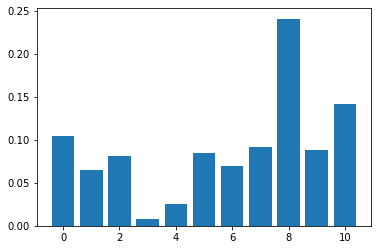

In [92]:
importance = dtc_model.feature_importances_

for i,v in enumerate(importance):
    print('Feature:%0d, Score: %.5f' %(i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [93]:
prediction = dtc_model.predict(x_test)

In [94]:
y_true = le.inverse_transform(y_test['Loan_Status'])
y_pred = le.inverse_transform(prediction)

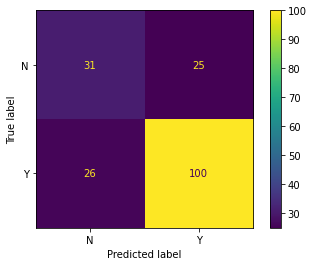

In [95]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N','Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [96]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.54      0.55      0.55        56
           Y       0.80      0.79      0.80       126

    accuracy                           0.72       182
   macro avg       0.67      0.67      0.67       182
weighted avg       0.72      0.72      0.72       182



In [97]:
graphviz_path = 'C:\Program Files\Graphviz\bin'

In [98]:
import os
os.environ["PATH"] += os.pathsep + graphviz_path

In [99]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns))

In [100]:
from cairosvg import svg2png
from IPython.display import Image

svg2png(bytestring=graph.pipe(format='svg'),write_to='output.png')
Image("output.png")

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

<h2>Report

<h3>Q6. Based on the feature importance, select a different set of features to build another dicision tree model. You should aim to improve the result of the baseline model.

In [101]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .44,
                                                    random_state=1)
print(x_train.shape, x_test.shape)

(308, 11) (242, 11)


In [102]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


Feature: 0, Score: 0.07072
Feature: 1, Score: 0.05728
Feature: 2, Score: 0.06387
Feature: 3, Score: 0.03163
Feature: 4, Score: 0.00756
Feature: 5, Score: 0.15480
Feature: 6, Score: 0.02154
Feature: 7, Score: 0.11081
Feature: 8, Score: 0.25973
Feature: 9, Score: 0.06708
Feature: 10, Score: 0.15498


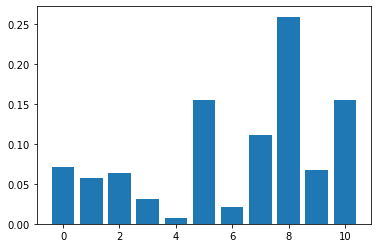

In [103]:
dtc_model = decisionTree.fit(x_train, y_train)

importance = dtc_model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [104]:
prediction = dtc_model.predict(x_test)

In [105]:
y_true = le.inverse_transform(y_test['Loan_Status'])
y_pred = le.inverse_transform(prediction)

In [106]:
cm1 = confusion_matrix(y_true, y_pred)
labels = ['N','Y']
ConfusionMatrixDisplay(cm1, display_labels=labels).plot

<bound method ConfusionMatrixDisplay.plot of <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000027F2BB457C0>>

In [107]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.48      0.60      0.53        72
           Y       0.81      0.72      0.76       170

    accuracy                           0.69       242
   macro avg       0.64      0.66      0.65       242
weighted avg       0.71      0.69      0.69       242



<b>Answer 6.</b>
<p>I used a test size of .44 in an attempt to increase accuracy by having a larger volume of data for the model to use.</p>
<p>


<h3>Q7. Write a summary to compare both the models. The summary should include: idea behind selecting those particular features and comparative analysis of the results of both the models.

<h6>Answer 7.</h6><p>
The actual results, as shown in the classification report above, are only slightly more accurate when looking at the weighted average. This has increased to 0.72 from 0.71. This was not the results I anticipated. One reason this could be the case is that the decision tree implemented in this example is not scaling as I expected it to with the implemented change, and that maybe a change to the criterion, or dataset would be more effective in this scenario.
The feature importance of the second model is notably different from the original model.